# Task 1.5 Text Mining

## Preparing Notebook for Text Mining

In [3]:
# install notebook
!pip install notebook

In [4]:
# set data rate limit
from jupyter_server.services.config import ConfigManager

cm = ConfigManager()
cm.update('server', {'ServerApp.iopub_data_rate_limit': 10000000})

{'ServerApp.iopub_data_rate_limit': 10000000}

In [5]:
# import libraries for text mining
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
myfile = open('20th_Century_Wiki.txt', encoding='utf-8') 

## Tokenization

In [8]:
# import txt file
with open('20th_Century_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
# sentence tokenization 
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10F

In [11]:
# word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The'

In [12]:
# create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4800 samples and 21039 outcomes>


In [13]:
dist_words.most_common(10)

[('.', 1267),
 ('the', 1106),
 (',', 963),
 ('of', 615),
 ('and', 402),
 ('to', 326),
 ('[', 300),
 (']', 300),
 ('in', 295),
 ('The', 292)]

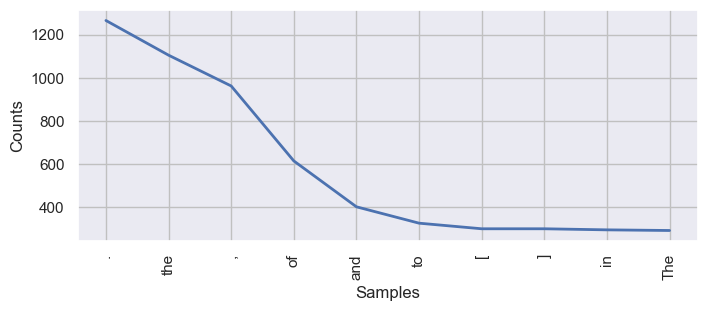

In [14]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Remove Stopwords

In [16]:
# defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'she', 'are', 'weren', "couldn't", 'didn', 'you', 'only', 'being', "you're", "it's", 'himself', 'ma', 'at', 'own', 'any', 'doing', "they'd", 'wasn', 'it', "shouldn't", 'through', 'their', 'then', 'hasn', 'had', 'such', 'did', "they're", 'against', 'before', 'over', 'wouldn', 'why', 'same', 'while', "she's", 'whom', 'hers', "hadn't", 'be', 'will', 'that', "don't", 'ain', 'during', 'into', 'your', 'haven', 'about', 'theirs', "we're", "she'll", 'some', 'how', 'in', 'him', 'off', 'very', "mustn't", 'needn', 'o', 'those', 'on', "we'll", "we'd", 'and', 'each', 'should', 'if', "didn't", "she'd", "it'd", 'd', 'what', "that'll", 'll', 'his', 'these', 'its', 'herself', 'between', 's', 'we', 'here', "won't", 'our', 'he', "they've", "aren't", "you'll", 'not', 'after', "wouldn't", "i'd", 'down', 'shan', "he's", 'is', 'under', 'for', "wasn't", 'won', "you've", 'does', 'than', 'just', 'most', 'both', 'from', 'of', 't', 'do', 'as', "i've", 'few', 'more', 'with', 'them', 'to', 'there', 'by', 'ours', '

In [17]:
# removing stopwords in words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [18]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pagesSearchSearchAppearanceDonateCreate',
 'accountLog',
 'inPersonal',
 'toolsDonate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War'

In [19]:
# create new FreqDist for filtered_words
dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4697 samples and 16349 outcomes>


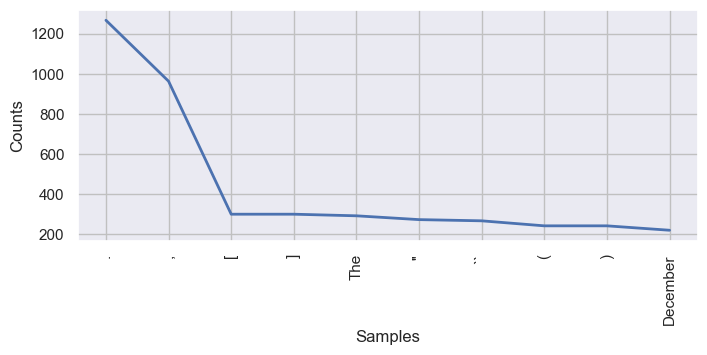

In [20]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [21]:
dist_words_filter

FreqDist({'.': 1267, ',': 963, '[': 300, ']': 300, 'The': 292, "''": 273, '``': 267, '(': 242, ')': 242, 'December': 220, ...})

In [22]:
# substitute all punctuations marks with a space 
sans_punc = re.sub("[^a-zA-Z]",  # search for all non-letters
                          " ",          # replace all non-letters with spaces
                          str(filtered_words))

In [23]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pagesSearchSearchAppearanceDonateCreate    accountLog    inPersonal    toolsDonate    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                          Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Bl

In [24]:
# word tokenization again
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', '

In [25]:
# create new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)

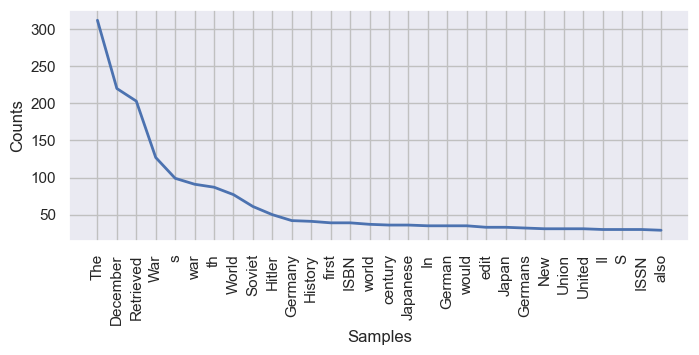

In [26]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

#### Removing stopwords and punctuation changed the results dramatically. It means words with more standalone meaning are shown on the plot. However, more refining is certainly needed to glean real meaning as there are still words in the chart that I would consider "noise" such as "The", "s", "In", etc.

In [28]:
dist_words_filter_2.most_common(20)

[('The', 312),
 ('December', 220),
 ('Retrieved', 203),
 ('War', 127),
 ('s', 99),
 ('war', 91),
 ('th', 87),
 ('World', 77),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 42),
 ('History', 41),
 ('first', 39),
 ('ISBN', 39),
 ('world', 37),
 ('century', 36),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35)]

# POS Tags with TextBlob

In [30]:
new_stopwords = ["The", "s", 'th', 'In', 'would']

In [31]:
# filter out new stopwords
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [32]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 7.07 ms


In [33]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion'

In [34]:
# download textblob and corpora
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [35]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('conll2000')
nltk.download('movie_reviews')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

True

In [36]:
import sys
!{sys.executable} -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [37]:
!pip install -U textblob

In [38]:
!python -m textblob.download_corpora lite

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lisag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [39]:
tags_list = text.tags

In [40]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pagesSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),


In [41]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [42]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [43]:
df_t = df_text.groupby('Word type').count().reset_index()

In [44]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,76
2,DT,11
3,EX,12
4,FW,43


In [45]:
top20 = df_t.nlargest(20, 'Words')

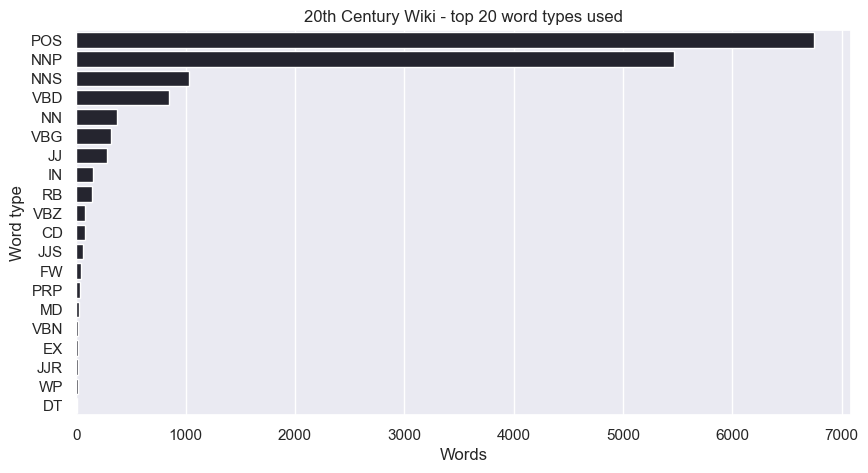

In [46]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th Century Wiki - top 20 word types used")

In [47]:
top10 = df_t.nlargest(10, 'Words')

# Top 10 Types of Words Used

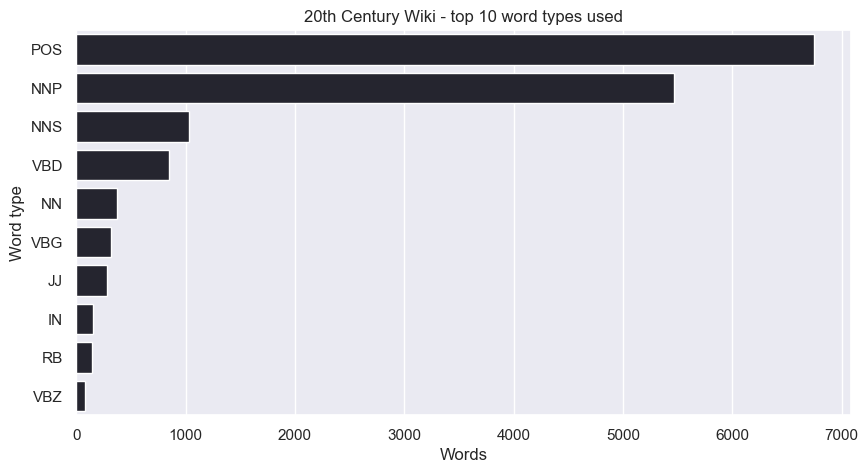

In [49]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century Wiki - top 10 word types used")

# Nouns

In [51]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurences')

In [52]:
top15_nouns

,Word,Occurences
289,'December,220
1253,'War,127
2583,'war,91
1303,'World,77
1104,'Soviet,61
537,'Hitler,50
536,'History,41
562,'ISBN,39
1776,'first,39
2609,'world,37


#### Ideally I would make capitalized "War" and "war" the same, but I'm not sure how to do that yet.

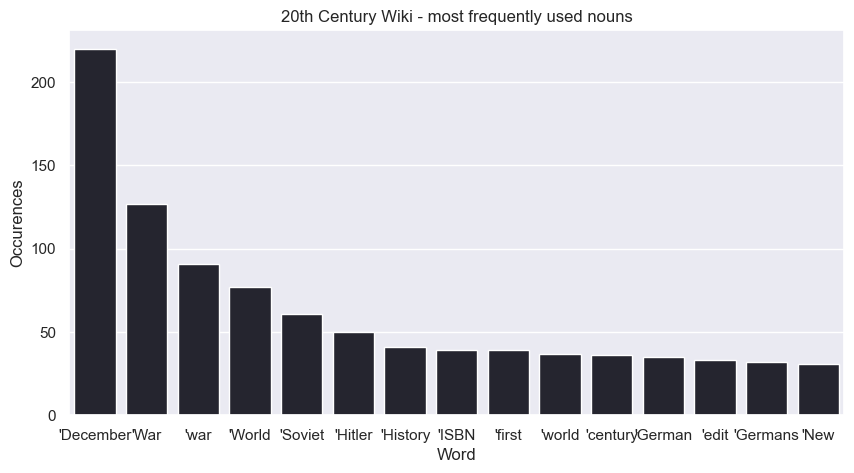

In [54]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_nouns).set_title("20th Century Wiki - most frequently used nouns")

# Verbs

In [56]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verbs = y.nlargest(15, 'Occurences')

In [57]:
top15_verbs

,Word,Occurences
27,'Retrieved,203
36,'United,31
0,'Allied,19
194,'led,15
318,'used,13
192,'launched,12
1,'Archived,10
92,'controlled,9
159,'forced,8
310,'turned,7


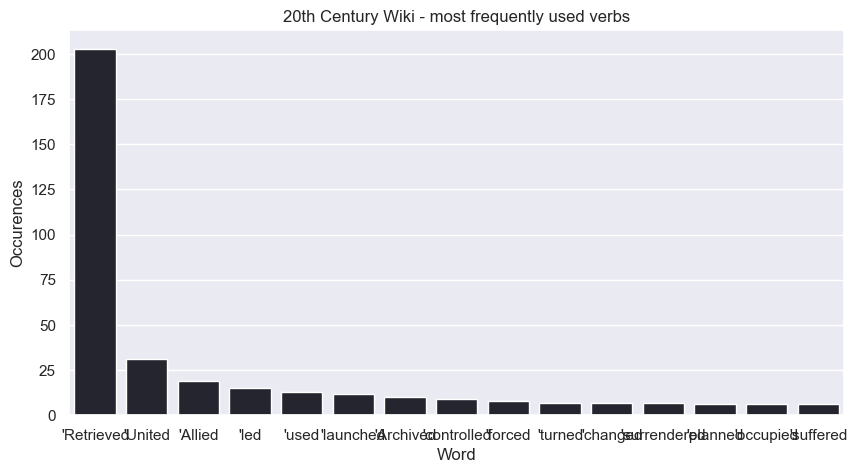

In [58]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_verbs).set_title("20th Century Wiki - most frequently used verbs")

# Adjectives

In [60]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adjectives = y.nlargest(15, 'Occurences')

In [61]:
top15_adjectives

,Word,Occurences
26,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
41,'Russian,7
1,'African,6
102,'political,6
103,'possible,5
7,'Baltic,5


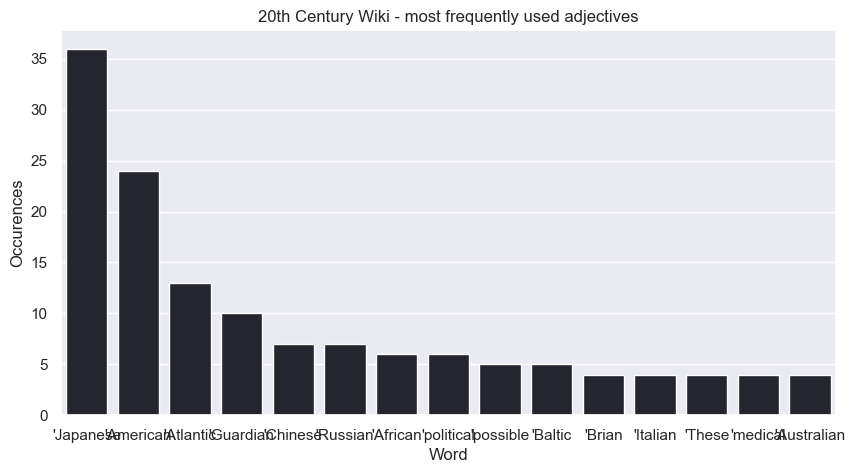

In [62]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_adjectives).set_title("20th Century Wiki - most frequently used adjectives")

#### Insights: In these frquency charts it is clear that war and political parties/powers are trends, including war/conflict related verbs. The adjectives indicate strong ethnic and political factors. It is interesting too that adjectives also indicate conjecture with the frequent use of "possible".

# Counting Country Occurences

In [65]:
# import country list csv
df_countries = pd.read_csv("countries_list_20th_century_1.5.csv")

In [66]:
df_countries.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [67]:
listToStr = ' '.join([str(elem) for elem in filtered])
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table

In [68]:
# create a count for the countries
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [69]:
all_counts

Counter({'December': 220,
         'Retrieved': 203,
         'War': 127,
         'war': 91,
         'World': 77,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 42,
         'History': 41,
         'first': 39,
         'ISBN': 39,
         'world': 37,
         'century': 36,
         'Japanese': 36,
         'German': 35,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'II': 30,
         'S': 30,
         'ISSN': 30,
         'also': 29,
         'September': 29,
         'Europe': 28,
         'July': 28,
         'became': 28,
         'A': 27,
         'end': 26,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'American': 24,
         'October': 24,
         'com': 24,
         'history': 23,
         'new': 23,
         'attack': 23,
         'weapons': 23,
         'This': 22

In [70]:
country_list = df_countries['country_name'].to_list()

In [71]:
country_list

[' Afghanistan ',
 '  Albania ',
 '  Algeria ',
 '  Andorra ',
 '  Angola ',
 '  Antigua and Barbuda ',
 '  Argentina ',
 '  Armenia ',
 '  Australia ',
 '  Austria ',
 '  Azerbaijan',
 ' Bahamas, The ',
 '  Bahrain ',
 '  Bangladesh ',
 '  Barbados ',
 '  Belarus ',
 '  Belgium ',
 '  Belize ',
 '  Benin ',
 '  Bhutan ',
 '  Bolivia ',
 '  Bosnia and Herzegovina ',
 '  Botswana ',
 '  Brazil ',
 '  Brunei ',
 '  Bulgaria ',
 '  Burkina Faso ',
 '  Burundi',
 ' Cambodia ',
 '  Cameroon ',
 '  Canada ',
 '  Cape Verde ',
 '  Central African Republic ',
 '  Chad ',
 '  Chile ',
 "  China, People's Republic of ",
 '  Colombia ',
 '  Comoros ',
 '  Congo, Democratic Republic of the ',
 '  Congo, Republic of the ',
 '  Costa Rica ',
 '  Croatia ',
 '  Cuba ',
 '  Cyprus ',
 '  Czech Republic',
 '  Denmark ',
 '   Djibouti ',
 '   Dominica ',
 '   Dominican Republic',
 '  East Timor ',
 '   Ecuador ',
 '   Egypt ',
 '   El Salvador ',
 '   Equatorial Guinea ',
 '   Eritrea ',
 '   Estonia ',

In [72]:
# remove trailing or leading spaces
country_list = [country.strip() for country in country_list]

In [73]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [74]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [75]:
# search for the names from the list in the dictionary
dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [76]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df = df.transpose().reset_index()

In [78]:
df.dtypes

index    object
0         int64
dtype: object

In [79]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [80]:
df.rename(columns = {"index":"Country", 0:"Times Mentioned"}, inplace = True)

In [81]:
df

,Country,Times Mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [82]:
df.shape

(208, 2)

In [83]:
df_filtered = df[df["Times Mentioned"] != 0]  # exclude all zero values

In [84]:
df_filtered

,Country,Times Mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
4,Angola,1
8,Australia,2
9,Austria,5
13,Bangladesh,2
15,Belarus,1
16,Belgium,2
25,Bulgaria,1


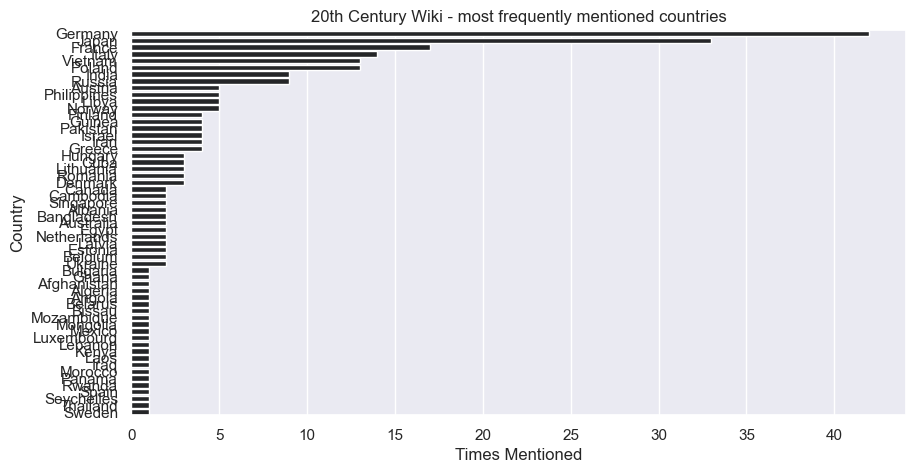

In [89]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times Mentioned", y = "Country",
    saturation=0.9, data = df_filtered.sort_values("Times Mentioned", ascending = False)).set_title("20th Century Wiki - most frequently mentioned countries")

In [91]:
top15_countries = df.nlargest(15, "Times Mentioned")

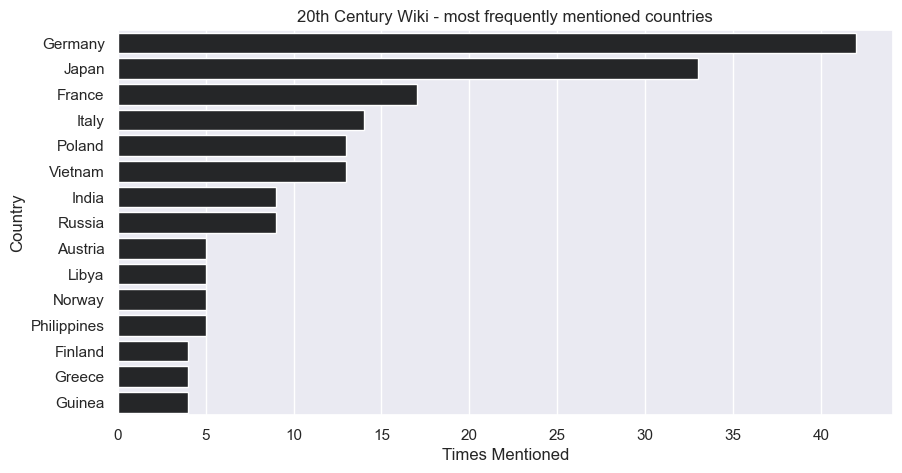

In [93]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times Mentioned", y = "Country",
    saturation=0.9, data = top15_countries.sort_values("Times Mentioned", ascending = False)).set_title("20th Century Wiki - most frequently mentioned countries")

#### Insights: There is a lot to notice in this plot, but particularly how the obvious impact of World War II in 20th Century world history. Most of the countries listed with the most frequency were significantly impacted by this conflict. The strange thing is The United States is missing, and I'm going to guess that's a formatting error. Maybe an alias would need to be changed?  

# Sentiment Analysis

#### Prediction: I would assume the polarity would be less than zero, because with all the war in the 20th Century the sentiment would likely be negative. I would assume the subjectivity would be closer to zero as hopefully this is mostly a factual document.

In [98]:
text_sent = TextBlob(str(filtered))

In [100]:
print(text_sent.sentiment)

Sentiment(polarity=0.048415795362829195, subjectivity=0.35485689240138346)


#### This is somewhat surprising as the polarity would mean the tone of this article is mostly neutral. The subjectivity is also higher than I would expect from a "history article" but it is from Wikipedia so of course the source must be taken with a grain of salt.